## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,RocCurveDisplay,auc

| Column Name                | Description                                       | Data Type     |
|----------------------------|---------------------------------------------------|---------------|
| Accident_Index             | Unique identifier for the accident                | Object        |
| Location_Easting_OSGR      | Easting coordinate                                | Float         |
| Location_Northing_OSGR     | Northing coordinate                               | Float         |
| Longitude                  | Longitude                                         | Float         |
| Latitude                   | Latitude                                          | Float         |
| Police_Force               | Police force identifier                           | Integer       |
| Accident_Severity          | Severity of the accident                          | Categorical   |
| Number_of_Vehicles         | Number of vehicles involved                       | Integer       |
| Number_of_Casualties       | Number of casualties                              | Integer       |
| Date                       | Date of the accident                              | Date          |
| Day_of_Week                | Day of the week                                   | Categorical   |
| Time                       | Time of the accident                              | Time          |
| Local_Authority_(District) | Local authority district                          | Integer       |
| Local_Authority_(Highway)  | Local authority highway                           | Object        |
| 1st_Road_Class             | Road class of the 1st road                        | Categorical   |
| 1st_Road_Number            | Road number of the 1st road                       | Integer       |
| Road_Type                  | Type of the road                                  | Categorical   |
| Speed_limit                | Speed limit on the road                           | Integer       |
| Junction_Detail            | Detail of the junction                            | Categorical   |
| Junction_Control           | Control of the junction                           | Categorical   |
| 2nd_Road_Class             | Road class of the 2nd road                        | Categorical   |
| 2nd_Road_Number            | Road number of the 2nd road                       | Integer       |
| Pedestrian_Crossing-Human_Control | Presence of human control at crossing     | Categorical   |
| Pedestrian_Crossing-Physical_Facilities | Physical facilities at crossing      | Categorical   |
| Light_Conditions           | Light conditions during the accident              | Categorical   |
| Weather_Conditions         | Weather conditions during the accident            | Categorical   |
| Road_Surface_Conditions    | Condition of the road surface                     | Categorical   |
| Special_Conditions_at_Site | Special conditions at the site                    | Categorical   |
| Carriageway_Hazards        | Hazards on the carriageway                        | Categorical   |
| Urban_or_Rural_Area        | Whether the area is urban or rural                | Categorical   |
| Did_Police_Officer_Attend_Scene_of_Accident | Police presence at the scene    | Categorical   |
| LSOA_of_Accident_Location  | Location of the accident (LSOA)                   | Object        |
| Year                       | Year of the accident                              | Integer       |
| Number_of_Casualties       | Number of casualties                              | Integer       |
| Number_of_Vehicles         | Number of vehicles involved                       | Integer       |


### Read the dataset

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
df.shape

(12316, 32)

In [6]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


### Preprocessing & cleaning Data

In [7]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [8]:
drop_missing_values_columns = df.isnull().sum() > 1000
drop_missing_values_columns = drop_missing_values_columns[drop_missing_values_columns].index
df = df.drop(columns=drop_missing_values_columns,axis=1)

hadnle_missing_values_columns = df.isnull().sum() > 0
hadnle_missing_values_columns = hadnle_missing_values_columns[hadnle_missing_values_columns].index

for i in hadnle_missing_values_columns:
    df[i] = df[i].fillna(method='ffill')

df = df.dropna()

/var/folders/c1/9m9gfrj553l8956nyk7q8gw40000gn/T/ipykernel_80318/3523469520.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[i] = df[i].fillna(method='ffill')


In [9]:
ss = StandardScaler()
df[['Number_of_vehicles_involved','Number_of_casualties']] = ss.fit_transform(df[['Number_of_vehicles_involved','Number_of_casualties']])

In [10]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].apply(lambda x: 'Under 18' if x == '5' else x)

### Identify and analyze patterns in the data.

In [11]:
display(df.groupby(['Weather_conditions','Driving_experience']).agg(
    Counts =('Driving_experience','count'),
))

Counts
Weather_conditions Driving_experience        
Cloudy             1-2yr                   21
                   2-5yr                   21
                   5-10yr                  45
                   Above 10yr              18
                   Below 1yr               18
                   No Licence               2
Fog or mist        2-5yr                    2
                   5-10yr                   5
                   Above 10yr               3
Normal             1-2yr                 1544
                   2-5yr                 2263
                   5-10yr                2962
                   Above 10yr            1943
                   Below 1yr             1232
                   No Licence              93
                   unknown                 25
Other              1-2yr                   49
                   2-5yr                   65
                   5-10yr                  85
                   Above 10yr              51
                   Below 1yr               45
                   No Licence               1
Raining            1-2yr                  233
                   2-5yr                  301
                   5-10yr                 355
                   Above 10yr             267
                   Below 1yr              152
                   No Licence              17
                   unknown                  6
Raining and Windy  1-2yr                    6
                   2-5yr                   10
                   5-10yr                   9
                   Above 10yr              10
                   Below 1yr                5
Snow               1-2yr                   10
                   2-5yr                   16
                   5-10yr                  18
                   Above 10yr              13
                   Below 1yr                2
                   No Licence               2
Unknown            1-2yr                   46
                   2-5yr                   51
                   5-10yr                  95
                   Above 10yr              59
                   Below 1yr               37
                   No Licence               3
                   unknown                  1
Windy              1-2yr                   18
                   2-5yr                   14
                   5-10yr                  28
                   Above 10yr              24
                   Below 1yr               13
                   unknown                  1

In [12]:
# we can see in the second table that most of the road condition in dry condition even in normal weather conditions they would have the higher rate of accedints
display(df.groupby(['Weather_conditions','Road_surface_conditions']).agg(
    Counts =('Driving_experience','count'),
))


Counts
Weather_conditions Road_surface_conditions        
Cloudy             Dry                          70
                   Wet or damp                  55
Fog or mist        Snow                          4
                   Wet or damp                   6
Normal             Dry                        8874
                   Snow                         15
                   Wet or damp                1173
Other              Dry                          86
                   Snow                         13
                   Wet or damp                 197
Raining            Dry                          17
                   Flood over 3cm. deep          2
                   Wet or damp                1312
Raining and Windy  Dry                           7
                   Wet or damp                  33
Snow               Dry                           7
                   Snow                         38
                   Wet or damp                  16
Unknown            Dry                         272
                   Wet or damp                  20
Windy              Dry                           6
                   Wet or damp                  92

In [13]:
display(df.groupby(['Weather_conditions','Accident_severity']).agg(
    Counts =('Driving_experience','count'),
))

Counts
Weather_conditions Accident_severity        
Cloudy             Serious Injury          8
                   Slight Injury         117
Fog or mist        Serious Injury          1
                   Slight Injury           9
Normal             Fatal injury          135
                   Serious Injury       1474
                   Slight Injury        8453
Other              Serious Injury         28
                   Slight Injury         268
Raining            Fatal injury           23
                   Serious Injury        158
                   Slight Injury        1150
Raining and Windy  Serious Injury          2
                   Slight Injury          38
Snow               Serious Injury          5
                   Slight Injury          56
Unknown            Serious Injury         51
                   Slight Injury         241
Windy              Serious Injury         16
                   Slight Injury          82

In [14]:
display(df.groupby(['Weather_conditions','Day_of_week']).agg(
    Counts =('Driving_experience','count'),
))

Counts
Weather_conditions Day_of_week        
Cloudy             Friday           13
                   Monday           23
                   Saturday         18
                   Sunday            5
                   Thursday         23
                   Tuesday          21
                   Wednesday        22
Fog or mist        Monday            4
                   Thursday          4
                   Tuesday           2
Normal             Friday         1698
                   Monday         1299
                   Saturday       1375
                   Sunday         1230
                   Thursday       1513
                   Tuesday        1497
                   Wednesday      1450
Other              Friday           36
                   Monday           45
                   Saturday         36
                   Sunday           21
                   Thursday         63
                   Tuesday          46
                   Wednesday        49
Raining            Friday          219
                   Monday          230
                   Saturday        164
                   Sunday          154
                   Thursday        184
                   Tuesday         156
                   Wednesday       224
Raining and Windy  Monday           16
                   Saturday          1
                   Sunday           14
                   Tuesday           2
                   Wednesday         7
Snow               Friday            5
                   Monday            5
                   Saturday         20
                   Sunday           11
                   Thursday          8
                   Tuesday           9
                   Wednesday         3
Unknown            Friday           59
                   Monday           47
                   Saturday         37
                   Sunday           24
                   Thursday         44
                   Tuesday          21
                   Wednesday        60
Windy              Friday           11
                   Monday           11
                   Saturday         15
                   Sunday            8
                   Thursday         12
                   Tuesday          16
                   Wednesday        25

In [15]:
display(df['Age_band_of_driver'].value_counts())

Age_band_of_driver
18-30       4270
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [16]:
display(df['Type_of_vehicle'].value_counts())

Type_of_vehicle
Automobile              3411
Lorry (41?100Q)         2292
Other                   1297
Pick up upto 10Q         877
Stationwagen             785
Public (12 seats)        749
Lorry (11?40Q)           622
Public (13?45 seats)     573
Public (> 45 seats)      485
Long lorry               403
Taxi                     337
Motorcycle               202
Ridden horse              89
Special vehicle           84
Turbo                     59
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [17]:
display(df['Age_band_of_driver'].value_counts())

Age_band_of_driver
18-30       4270
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [18]:
display(df['Type_of_vehicle'].value_counts())

Type_of_vehicle
Automobile              3411
Lorry (41?100Q)         2292
Other                   1297
Pick up upto 10Q         877
Stationwagen             785
Public (12 seats)        749
Lorry (11?40Q)           622
Public (13?45 seats)     573
Public (> 45 seats)      485
Long lorry               403
Taxi                     337
Motorcycle               202
Ridden horse              89
Special vehicle           84
Turbo                     59
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [19]:

display(df['Number_of_vehicles_involved'].mean())

1.4308940192326824e-16

In [20]:

display(df['Number_of_casualties'].mean())

-6.462102022341146e-17

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

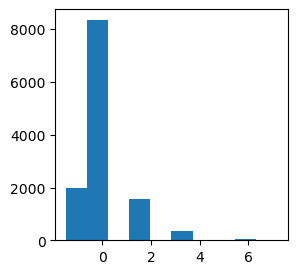

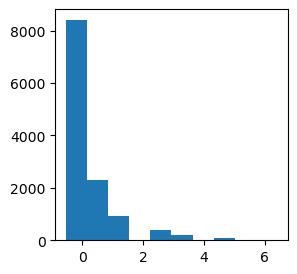

In [21]:
plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_vehicles_involved'])
plt.show()

plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_casualties'])
plt.show()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


In [22]:
Encoded_df = df.copy()
le = LabelEncoder()

for i in Encoded_df.select_dtypes(include='object').columns:
  Encoded_df[i] = le.fit_transform(Encoded_df[i])

display(df.select_dtypes(exclude='object').corr())

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213431
Number_of_casualties,0.213431,1.000000


## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


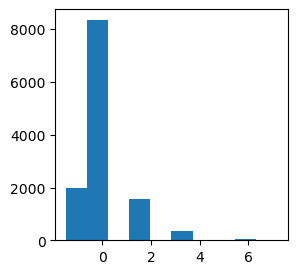

In [23]:
plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_vehicles_involved'])
plt.show()

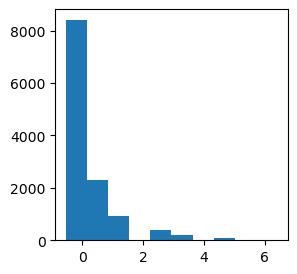

In [24]:
plt.figure(figsize=(3, 3))
plt.hist(df['Number_of_casualties'])
plt.show()

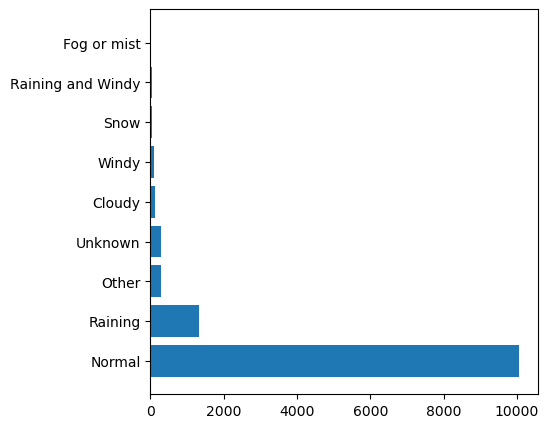

In [25]:

plt.figure(figsize=(5, 5))
plt.barh(df['Weather_conditions'].value_counts().index, df['Weather_conditions'].value_counts().values)
plt.show()

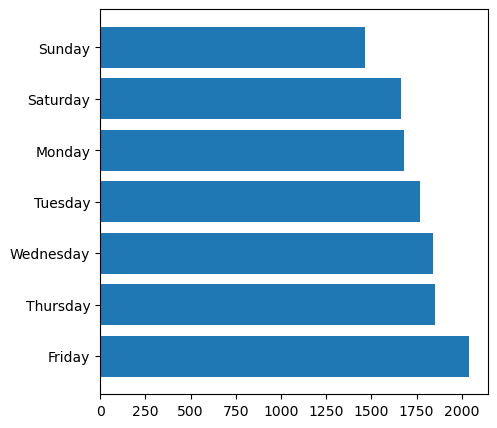

In [26]:


plt.figure(figsize=(5, 5))
plt.barh(df['Day_of_week'].value_counts().index, df['Day_of_week'].value_counts().values)
plt.show()

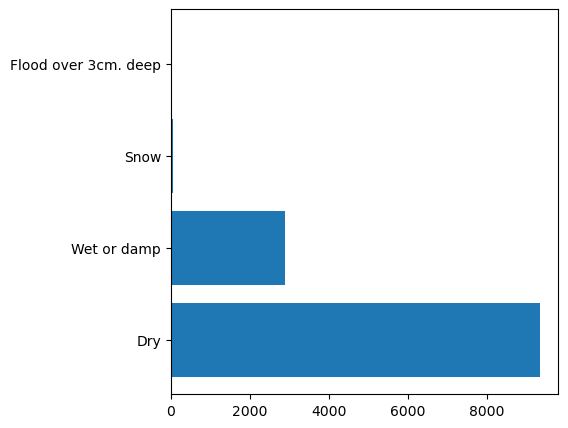

In [27]:
plt.figure(figsize=(5, 5))
plt.barh(df['Road_surface_conditions'].value_counts().index, df['Road_surface_conditions'].value_counts().values)
plt.show()

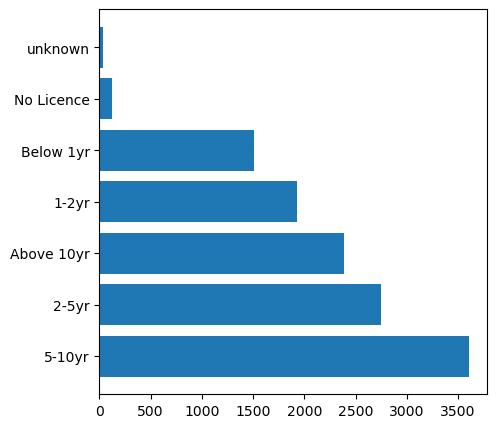

In [28]:

plt.figure(figsize=(5, 5))
plt.barh(df['Driving_experience'].value_counts().index, df['Driving_experience'].value_counts().values)
plt.show()

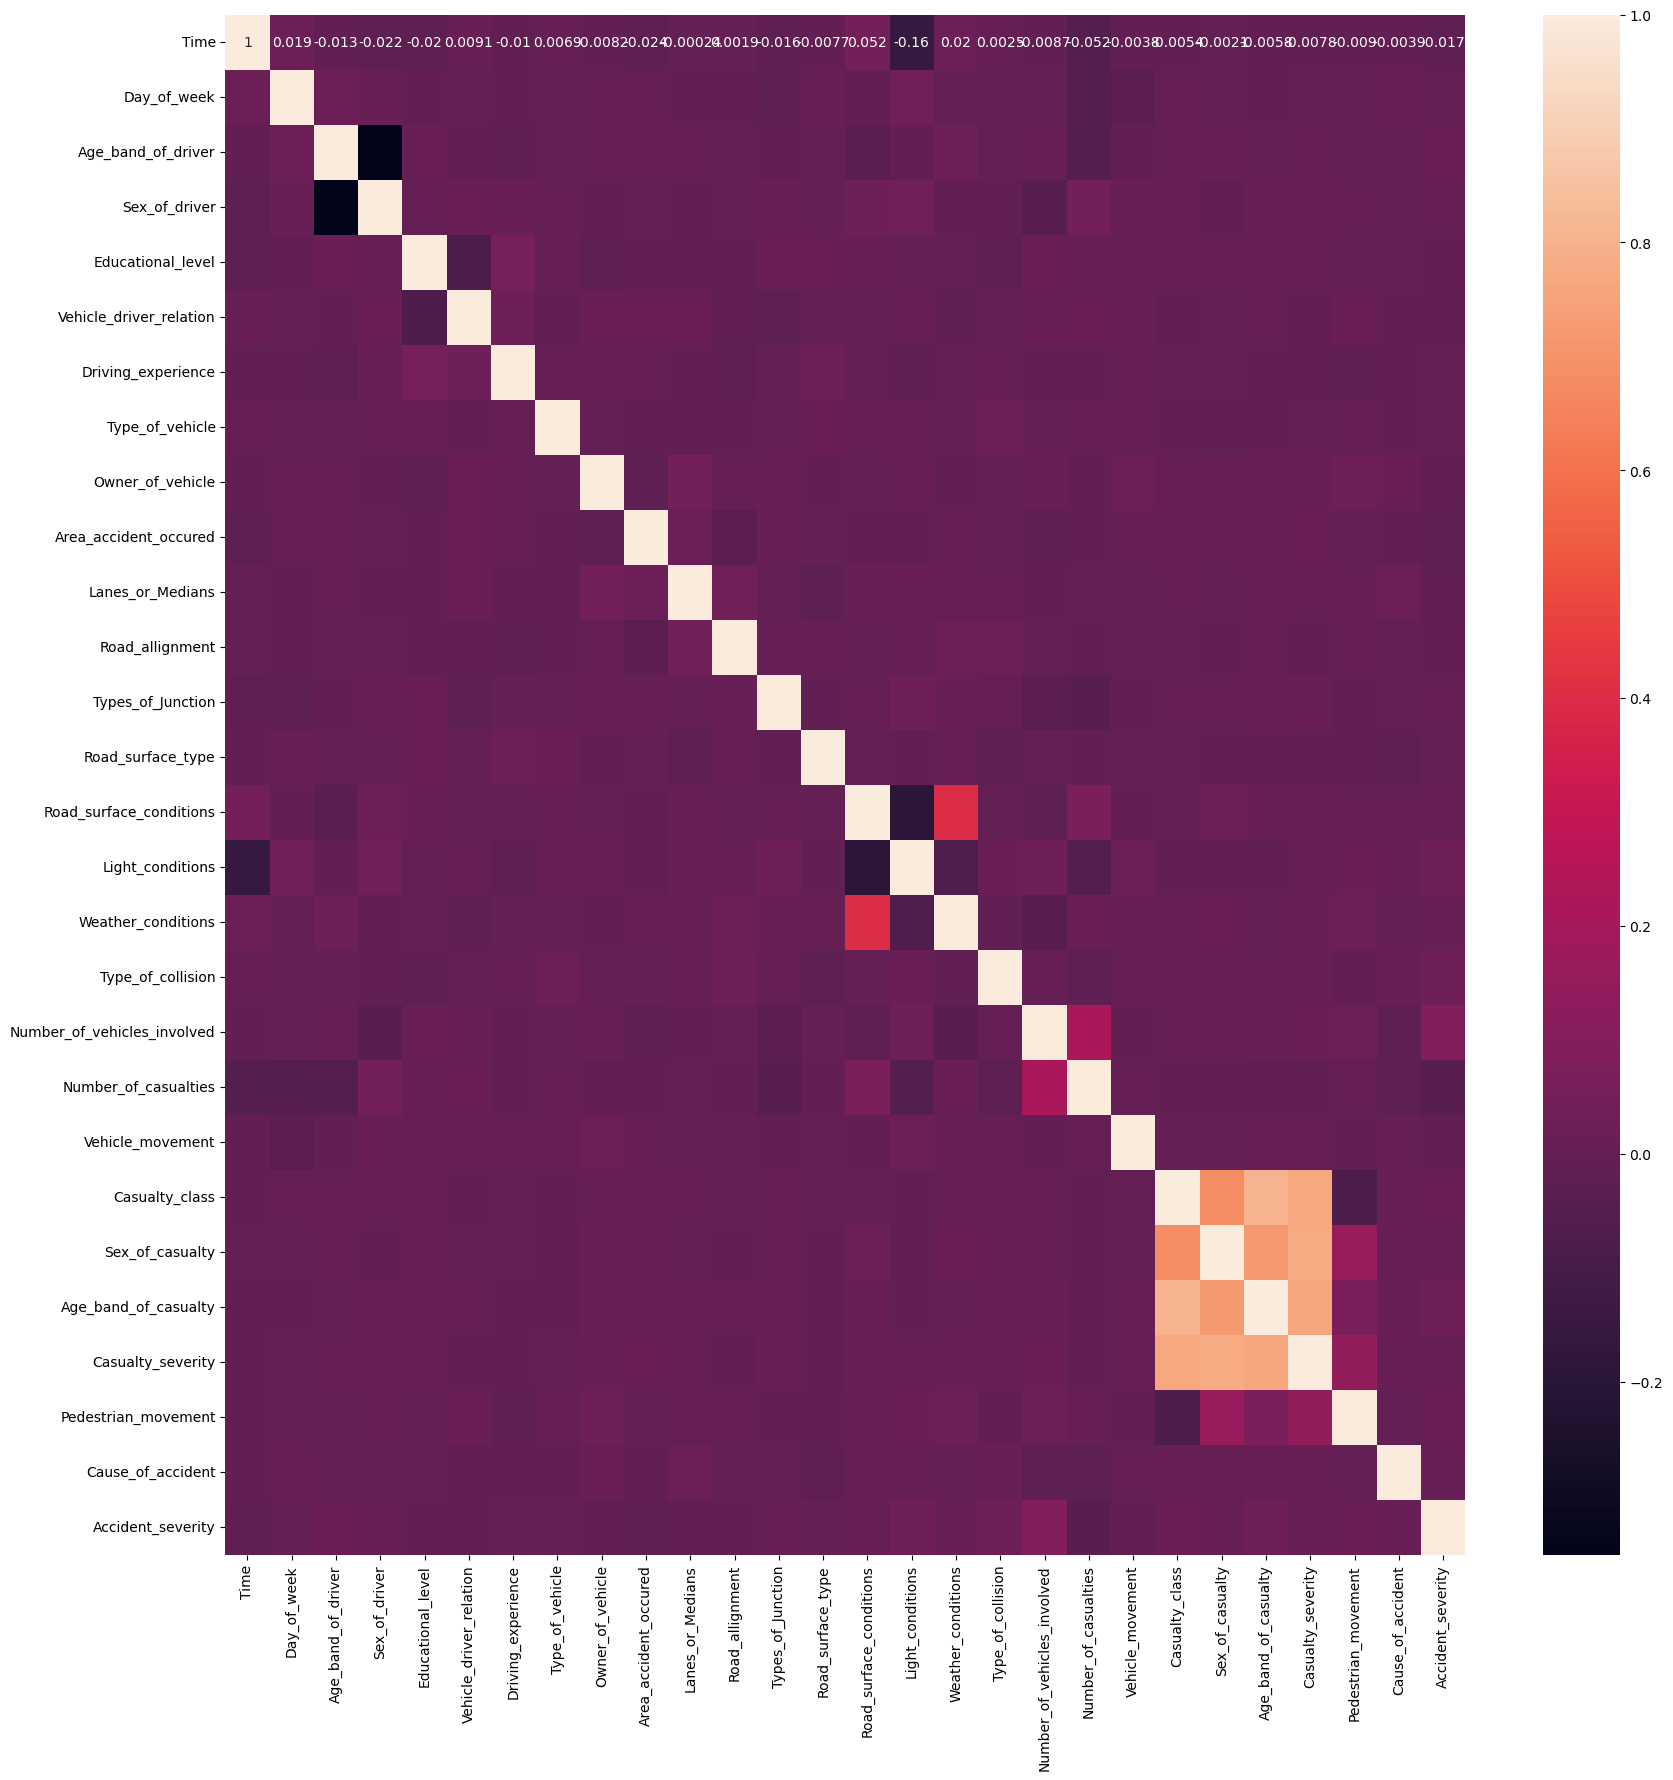

In [29]:

plt.figure(figsize=(20, 20))
sns.heatmap(Encoded_df.corr(), annot=True)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

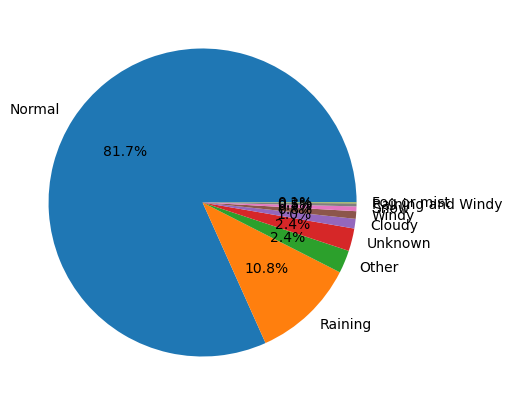

In [30]:
plt.figure(figsize=(5, 5))
plt.pie(df['Weather_conditions'].value_counts(), labels=df['Weather_conditions'].value_counts().index, autopct='%1.1f%%')
plt.show()

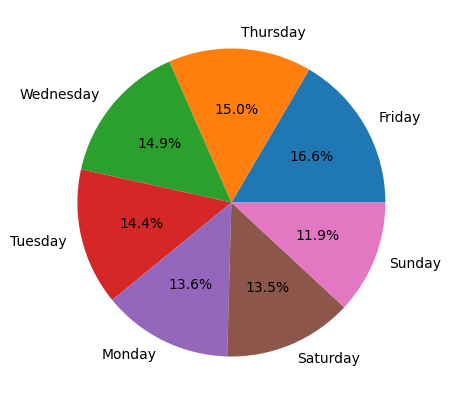

In [31]:

plt.figure(figsize=(5, 5))
plt.pie(df['Day_of_week'].value_counts(), labels=df['Day_of_week'].value_counts().index, autopct='%1.1f%%')
plt.show()

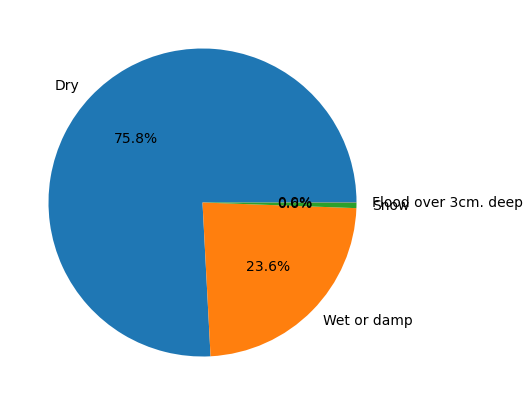

In [32]:

plt.figure(figsize=(5, 5))
plt.pie(df['Road_surface_conditions'].value_counts(), labels=df['Road_surface_conditions'].value_counts().index, autopct='%1.1f%%')
plt.show()

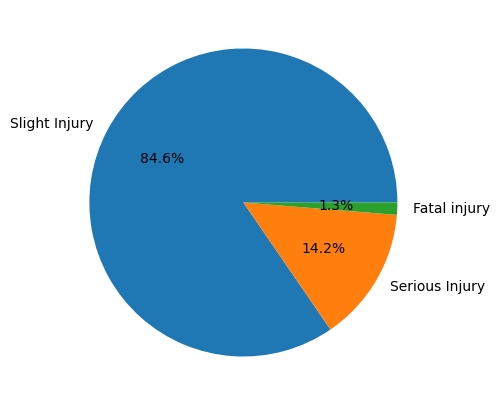

In [33]:

plt.figure(figsize=(5, 5))
plt.pie(df['Accident_severity'].value_counts(), labels=df['Accident_severity'].value_counts().index, autopct='%1.1f%%')
plt.show()

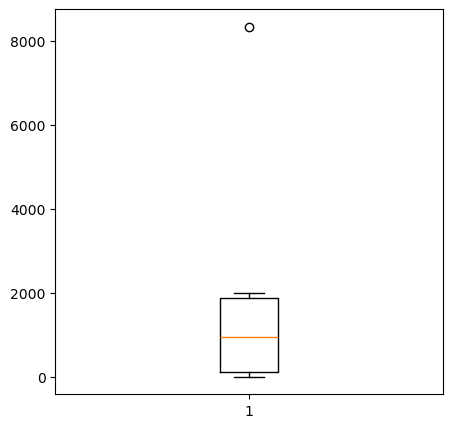

In [34]:

plt.figure(figsize=(5, 5))
plt.boxplot(df['Number_of_vehicles_involved'].value_counts())
plt.show()

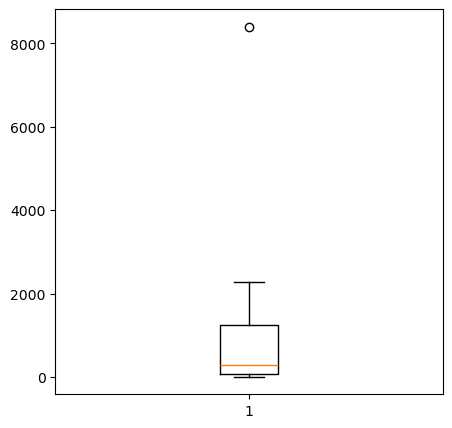

In [35]:

plt.figure(figsize=(5, 5))
plt.boxplot(df['Number_of_casualties'].value_counts())
plt.show()

## Insights & Decisions of EDA

### Insights
- we can see in the first table that most of the driving experience in 5-10 years even in normal weather conditions they would have the higher rate of accedints
- we can see in the second table that most of the road condition in dry condition even in normal weather conditions they would have the higher rate of accedints
- There is no much fatal injuries in whatever the weather condition are. if they are exist they tend to be small number
- Sunday would be the safest day to have an accedint in all types of conditions
- Accedint occur more in driver between 18-50 years
- Automobile vehicle tend to have accident more than any type of cars
- both numerical values tend to have skewed to the left distribution
- we can see from the correlation of the heatmap that there is no correlation
- in most of the columns except Casulaty_class, Sex_of_casualty, Age-band_of_casualty, Casualty_severity columns. and it's highly postive correlated
- From the boxplot we can see that there is only one value in both numerical values are outliers
- the calculation of the numerical values would depend on the values counts becuase the numbers are small even after the standard scaler

### Decisions
- Make warning especially in normal weather conditions becuase they tend to have more accidents
- Try to fix the problem in automobile cars to minimize the accidents
- Do seminar about driving recklessly especially for people between the ages of 18-50
- Warn people no to dry in wet weather condition becuase of slippery roads
- After 2 years from getting first driving license, start do some warning and needing to test driving skills due to increase of accidents after 2 years of getting the driving license rapidly

## Train-Test Split

In [36]:
X = df.drop(columns=['Accident_severity','Sex_of_driver','Road_allignment','Pedestrian_movement'],axis=1)
y = df['Accident_severity']

numeric_features = ['Number_of_vehicles_involved', 'Number_of_casualties']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Time','Day_of_week', 'Age_band_of_driver','Educational_level', 'Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured','Lanes_or_Medians', 'Types_of_Junction','Road_surface_type', 'Road_surface_conditions', 'Light_conditions','Weather_conditions', 'Type_of_collision', 'Vehicle_movement','Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty','Casualty_severity', 'Cause_of_accident']

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

#### Logistic Regression

In [37]:
LR_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))]
)

LR_model.fit(X_train,y_train)
LR_y_pred = LR_model.predict(X_test)

#### Decision Tree Classifier

In [38]:
DTC_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

DTC_model.fit(X_train,y_train)
DTC_y_pred = DTC_model.predict(X_test)

#### Support Vector Machine (SVM)

In [39]:
SVC_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

SVC_model.fit(X_train,y_train)
SVC_y_pred = SVC_model.predict(X_test)

#### K-Neighbors Classifier

In [40]:
KNN_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=9))]
)

KNN_model.fit(X_train,y_train)
KNN_y_pred = KNN_model.predict(X_test)

## Model Evaluation

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

This is the model LogisticRegression
Confusion Matrix [[   2    2   33]
 [   0   24  344]
 [   2   27 2029]]
Accuracy Score 0.8343483556638246
Recall Score 0.8343483556638246
F1 Score 0.8343483556638247
Precision Score 0.8343483556638246


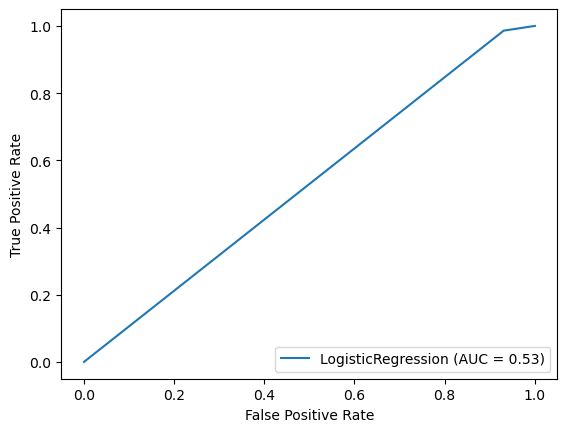




This is the model DecisionTreeClassifier
Confusion Matrix [[  17    3   17]
 [   4  153  211]
 [   7  146 1905]]
Accuracy Score 0.8424685343077548
Recall Score 0.8424685343077548
F1 Score 0.8424685343077548
Precision Score 0.8424685343077548


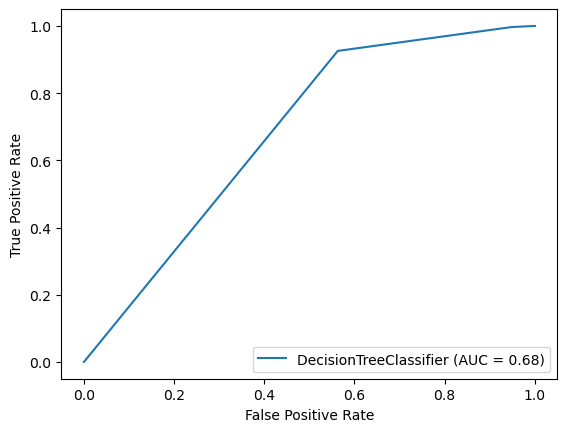




This is the model SVC
Confusion Matrix [[   0    0   37]
 [   0    4  364]
 [   0    0 2058]]
Accuracy Score 0.8371904181892001
Recall Score 0.8371904181892001
F1 Score 0.8371904181892001
Precision Score 0.8371904181892001


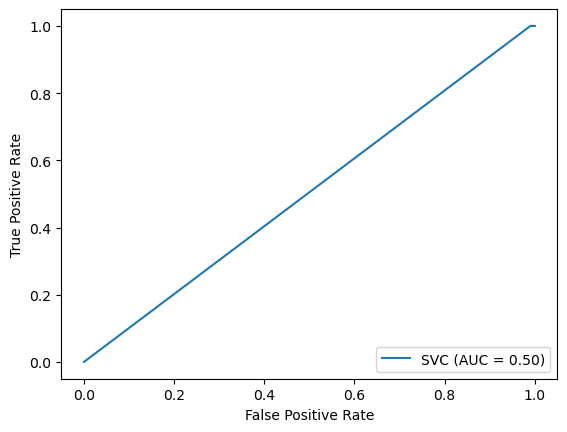




This is the model KNeighborsClassifier
Confusion Matrix [[   4    0   33]
 [   0   20  348]
 [   0    8 2050]]
Accuracy Score 0.8420625253755583
Recall Score 0.8420625253755583
F1 Score 0.8420625253755583
Precision Score 0.8420625253755583


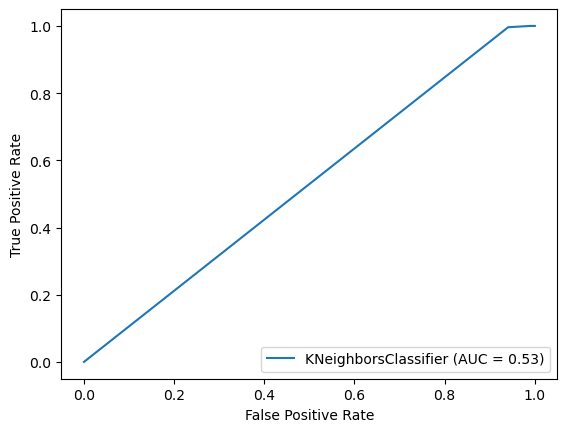

In [41]:
models_prediction = [LR_y_pred,DTC_y_pred,SVC_y_pred,KNN_y_pred]
models_name = ['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier']

# Scores need to make it numerical to be calculated that's why I used Label Encoder in y_pred of each model and y_test
le = LabelEncoder()
fitted_y_test = le.fit_transform(y_test)
    
for i in range(4):
    fitted_prediction= le.fit_transform(models_prediction[i])
    print(f"This is the model {models_name[i]}")
    print(f"Confusion Matrix {confusion_matrix(y_test,models_prediction[i])}")
    print(f"Accuracy Score {accuracy_score(y_test,models_prediction[i])}")
    print(f"Recall Score {recall_score(y_test,models_prediction[i],average='micro')}")
    print(f"F1 Score {f1_score(y_test,models_prediction[i],average='micro')}")
    print(f"Precision Score {precision_score(y_test,models_prediction[i],average='micro')}")
    fpr, tpr, thresholds = roc_curve(fitted_y_test,fitted_prediction,pos_label=2)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=models_name[i])
    display.plot()
    plt.show()
    print('\n'*2)
    
    ### roc_auc_score didn't work with me due to the multi-class problem
    # print(f"ROC & AUC Score {roc_auc_score(y_test,i,multi_class='ovr')}")



## Summary of Findings
This analysis investigates road traffic accident data to understand patterns, relationships, and potential predictive features. The key findings from our exploratory data analysis (EDA) are:

#### Dataset Composition:
- The dataset includes various features such as the number of vehicles involved, accident severity, casualties, and time of the accident.
Missing values were handled appropriately to ensure data quality.
#### Data Distribution:
- The distribution of features such as accident severity, the number of vehicles involved, and casualties are visualized to understand their patterns and identify any potential outliers.
#### Correlations:
- Correlation analysis reveals significant relationships between numerical features.
-  Certain features, like the number of vehicles involved, show strong correlations with accident severity and casualties.
#### Comparative Analysis of Models:
- Different machine learning models were evaluated, including Decision Tree Classifier, SVC, and others.
- Evaluation metrics included accuracy, precision, recall, and F1-score.

---------------------------------------------------------------------------------------------------------

#### Comparative Metrics
- Decision Tree Classifier: Exhibited the highest accuracy and F1-score among the models tested.
- SVC: Showed the lowest performance in terms of accuracy and recall.
#### Evaluate Trade-offs
- Decision Tree Classifier: Offers high interpretability and performance but can be prone to overfitting.
- SVC: Generally robust to overfitting but may perform poorly with imbalanced datasets.
#### Justify Your Choice
- The Decision Tree Classifier was chosen due to its superior performance in accuracy and F1-score, making it the most effective model for - this dataset.
#### Feature Importance
- The number of vehicles involved was identified as the most important feature due to its strong positive correlation with accident - severity and casualties.
#### Model Limitations
- The models struggled with categorical data and timeseries features, limiting their predictive capabilities.
- The dataset's limited numerical features constrained the model's performance.
#### Future Improvements
- Explore alternative algorithms like Naive Bayes or ensemble methods.
- Implement feature selection techniques such as Lasso regression.
- Improve data cleaning methods using regression models.
- Utilize grid search for hyperparameter tuning to optimize model performance.
- Enhance the dataset with additional numerical features for better predictions.
- Investigate relationships between features to refine feature engineering and data collection strategies.